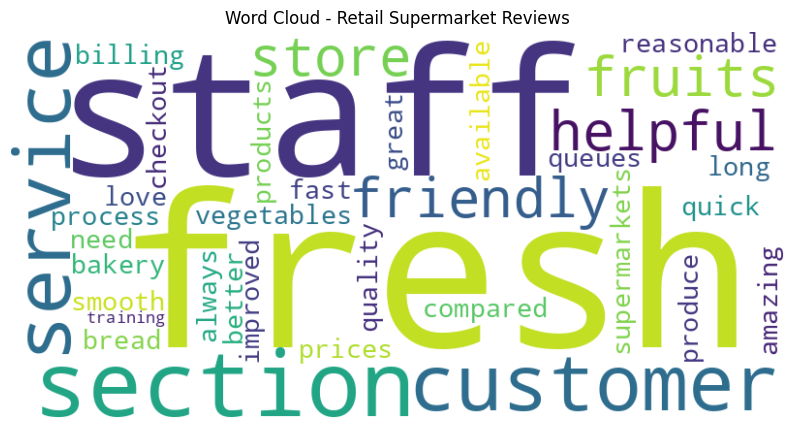

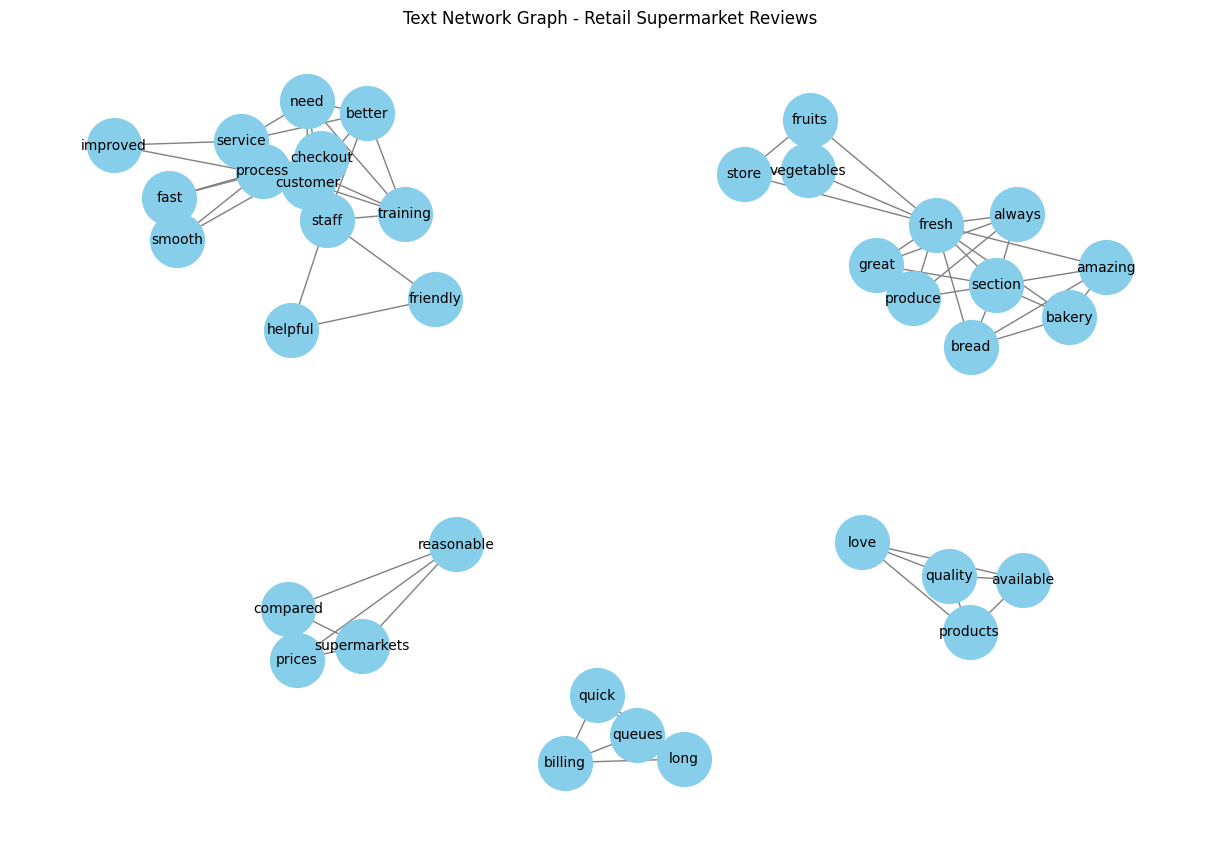

🔎 Top 10 Most Connected Words (Key Themes):
fresh: 0.286
staff: 0.200
section: 0.200
customer: 0.171
service: 0.171
need: 0.143
better: 0.143
training: 0.143
bakery: 0.114
amazing: 0.114


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import networkx as nx
import itertools

# -------------------------------
# Step 1: Create a Sample Dataset (Simulating retail supermarket reviews)
# -------------------------------
data = {
    "Review": [
        "The staff was very friendly and helpful",
        "The store has fresh fruits and vegetables",
        "Billing was quick but the queues were long",
        "Prices are reasonable compared to other supermarkets",
        "The bakery section is amazing with fresh bread",
        "Customer service could be improved",
        "I love the quality of products available",
        "Checkout process was smooth and fast",
        "The fresh produce section is always great",
        "Customer service staff need better training"
    ]
}
df = pd.DataFrame(data)

# -------------------------------
# Step 2: Preprocess Text (without NLTK)
# -------------------------------
stop_words = set(STOPWORDS)
cleaned_texts = []

for sentence in df['Review']:
    tokens = [word.lower() for word in sentence.split() if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_texts.append(tokens)

all_words = list(itertools.chain.from_iterable(cleaned_texts))  # flatten list

# -------------------------------
# Step 3: Word Cloud (Wordle/Tag Cloud)
# -------------------------------
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Retail Supermarket Reviews")
plt.show()

# -------------------------------
# Step 4: Build Word Co-occurrence Network
# -------------------------------
edges = []
for tokens in cleaned_texts:
    for pair in itertools.combinations(tokens, 2):
        edges.append(pair)

G = nx.Graph()
G.add_edges_from(edges)

# Plot Network Graph
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, edge_color="gray")
plt.title("Text Network Graph - Retail Supermarket Reviews")
plt.show()

# -------------------------------
# Step 5: Insights (Degree Centrality)
# -------------------------------
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("🔎 Top 10 Most Connected Words (Key Themes):")
for word, score in sorted_centrality:
    print(f"{word}: {score:.3f}")